In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt


In [ ]:
# Sample data (You can replace this with your actual dataset)
data = {
    'activity': [2, 4, 5, 3, 6, 8, 7, 6, 5, 3],
    'notes': [
        "Feeling a bit down today.",
        "Had a good workout, feeling positive.",
        "Stressful day at work.",
        "Feeling relaxed after meditation.",
        "Excited about the weekend!",
        "Feeling overwhelmed with tasks.",
        "Enjoyed a nice walk outside.",
        "Feeling motivated to achieve my goals.",
        "Had a great time with friends.",
        "Feeling anxious about an upcoming event."
    ]
}

df = pd.DataFrame(data)

In [ ]:
# Sentiment Analysis
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(note):
    return analyzer.polarity_scores(note)['compound']

df['sentiment_score'] = df['notes'].apply(get_sentiment_score)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Machine Learning Models
X = df[['activity', 'sentiment_score']]
y = df['activity']

In [ ]:
# Create models
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor(random_state=42)
svr_reg = SVR(kernel='linear')

In [ ]:
# Fit models
linear_reg.fit(X, y)
random_forest_reg.fit(X, y)
svr_reg.fit(X, y)

SVR(kernel='linear')

In [ ]:
# Predicting mood for a new activity level and note
new_activity = 4  # Replace this with the new activity level
new_note = "Feeling great after a productive day!"
new_sentiment_score = get_sentiment_score(new_note)

new_data = [[new_activity, new_sentiment_score]]

predicted_mood_linear_reg = linear_reg.predict(new_data)[0]
predicted_mood_random_forest_reg = random_forest_reg.predict(new_data)[0]
predicted_mood_svr = svr_reg.predict(new_data)[0]

print("Predicted mood using Linear Regression:", predicted_mood_linear_reg)
print("Predicted mood using Random Forest Regression:", predicted_mood_random_forest_reg)
print("Predicted mood using SVR:", predicted_mood_svr)

Predicted mood using Linear Regression: 4.0
Predicted mood using Random Forest Regression: 3.65
Predicted mood using SVR: 4.037868717752071


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


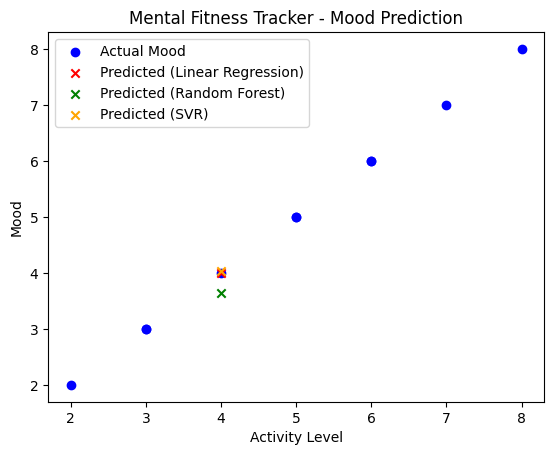

In [ ]:
# Visualization
plt.scatter(df['activity'], df['activity'], c='blue', label='Actual Mood')
plt.scatter(new_activity, predicted_mood_linear_reg, c='red', marker='x', label='Predicted (Linear Regression)')
plt.scatter(new_activity, predicted_mood_random_forest_reg, c='green', marker='x', label='Predicted (Random Forest)')
plt.scatter(new_activity, predicted_mood_svr, c='orange', marker='x', label='Predicted (SVR)')
plt.xlabel('Activity Level')
plt.ylabel('Mood')
plt.legend()
plt.title('Mental Fitness Tracker - Mood Prediction')
plt.show()